## OK We Start Yeshi We start

In [32]:
!pip install pandas numpy matplotlib seaborn scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
import pandas as pd            # For data manipulation and analysis
import numpy as np             # For numerical operations

import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns           # For more advanced and attractive data visualizations

from sklearn.model_selection import train_test_split  # For splitting the data into training and testing sets
from sklearn.linear_model import LinearRegression     # For building a linear regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # For model evaluation metrics

main_df = pd.read_csv('./CSV/main_df.csv').drop(['Unnamed: 0'], axis=1)

In [34]:
print(main_df.info())
print(main_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           2965 non-null   int64  
 1   round            2965 non-null   int64  
 2   race_name        2965 non-null   object 
 3   name             2965 non-null   object 
 4   constructor      2965 non-null   object 
 5   grid             2965 non-null   float64
 6   qual_position    2965 non-null   float64
 7   q_best           2965 non-null   float64
 8   q_worst          2965 non-null   float64
 9   q_mean           2965 non-null   float64
 10  ageDuringRace    2965 non-null   object 
 11  circuitId        2965 non-null   object 
 12  locality         2965 non-null   object 
 13  country          2965 non-null   object 
 14  type             2965 non-null   object 
 15  direction        2965 non-null   object 
 16  length           2965 non-null   float64
 17  weather       

In [35]:
# Display unique values in the 'weather' column
print(main_df['weather'].unique())

['overcast, 19°c (66°f) dry' 'dry , 32°c dry' 'dry  '
 'mostly cloudy , dry  ' 'sunny  '
 'overcast, air  20.5°c  (69.0°f), track  29.0°c  (84.0°f). '
 'temperatures up to 27.6°c  (81.7°f)  wind speeds up to 16.4 kilometres per hour  (10.2mph) '
 'partially cloudy , hot and dry  '
 'mostly cloudy  with maximum temperatures reaching 21 degrees during the day. '
 'cloudy  with maximum temperatures reaching 26 degrees during the day. '
 'overcast. wet track at start, then drying scattered thunderstorms during the day, temperatures reaching a maximum of 26 degrees. '
 'mostly cloudy  ' 'sunny   air  25°c  (77°f), track  39.5°c  (103.5°f) '
 'clear . air  29.0°c  (84.0°f) track  35.0°c  (95.0°f). '
 'rain. air  20°c  (68°f) track  24°c  (75°f) '
 'fine and dry  21°c  (70°f) ambient temperature ,33°c  (91°f) track temperature  '
 'sunny , ' 'sunny , air  23.5°c  (74.0°f), track  48.0°c  (118.5°f) '
 'clear  skies  air temp  30 °c  (86 °f) during the day, dropping to 24 °c  (75.2 °f). wind sp

In [36]:
import re

def parse_weather(description):
    # Extract weather type (e.g., sunny, cloudy)
    weather_type = re.search(r'(sunny|cloudy|overcast|partly cloudy|clear|rain|wet|dry)', description, re.IGNORECASE)
    weather_type = weather_type.group(0) if weather_type else None
    
    # Extract air temperature in Celsius
    air_temp_match = re.search(r'air\s+([\d.]+)°c', description, re.IGNORECASE)
    air_temp = float(air_temp_match.group(1)) if air_temp_match else None
    
    # Extract track temperature in Celsius
    track_temp_match = re.search(r'track\s+([\d.]+)°c', description, re.IGNORECASE)
    track_temp = float(track_temp_match.group(1)) if track_temp_match else None
    
    # Extract general temperature in Celsius if air temp not specified
    general_temp_match = re.search(r'(\d{1,2}\.\d|\d{1,2})°c', description)
    general_temp = float(general_temp_match.group(1)) if general_temp_match and not air_temp_match else None
    
    # Extract wind speed if present
    wind_speed_match = re.search(r'(\d+\.\d+|\d+)\s*(km/h|m/s)', description, re.IGNORECASE)
    wind_speed = float(wind_speed_match.group(1)) if wind_speed_match else None
    wind_unit = wind_speed_match.group(2) if wind_speed_match else None
    
    # Return parsed data as a dictionary
    return {
        'weather_type': weather_type,
        'air_temp_c': air_temp,
        'track_temp_c': track_temp,
        'general_temp_c': general_temp,
        'wind_speed': wind_speed,
        'wind_unit': wind_unit
    }

In [37]:
# Apply the parsing function to each entry in the 'weather' column
parsed_weather_data = main_df['weather'].apply(parse_weather)

# Convert the parsed data into a DataFrame
parsed_weather_df = pd.DataFrame(parsed_weather_data.tolist())

# Join the parsed data back to the original DataFrame
main_df = pd.concat([main_df, parsed_weather_df], axis=1)


In [38]:
print(main_df.iloc[:, 16:].head())  # Display the first few rows from the 16th column onward

   length                    weather  finish_position  points  filled_splits  \
0   5.303  overcast, 19°c (66°f) dry              1.0    25.0          0.000   
1   5.303  overcast, 19°c (66°f) dry              2.0    18.0         26.777   
2   5.303  overcast, 19°c (66°f) dry              3.0    15.0         30.027   
3   5.303  overcast, 19°c (66°f) dry              4.0    12.0         35.284   
4   5.303  overcast, 19°c (66°f) dry              5.0    10.0         47.639   

  weather_type  air_temp_c  track_temp_c  general_temp_c  wind_speed wind_unit  
0     overcast         NaN           NaN            19.0         NaN      None  
1     overcast         NaN           NaN            19.0         NaN      None  
2     overcast         NaN           NaN            19.0         NaN      None  
3     overcast         NaN           NaN            19.0         NaN      None  
4     overcast         NaN           NaN            19.0         NaN      None  


In [39]:
# Assuming your weather columns start from index 16 onward
weather_columns = main_df.columns[21:]  # Adjust if needed

for column in weather_columns:
    unique_values = main_df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'weather_type': ['overcast' 'dry' 'cloudy' 'sunny' None 'clear' 'rain' 'partly cloudy'
 'wet']
Unique values in 'air_temp_c': [ nan 20.5 25.  29.  20.  23.5 12.5]
Unique values in 'track_temp_c': [ nan 29.  39.5 35.  24.  48.  15.5]
Unique values in 'general_temp_c': [19.  32.   nan 27.6 21.  17.5 32.5 25.  18.5 20.5 14.5 23.  22.5 28.5
 27.  18.  17.  26.  21.5 16.  12.  31.5 15.  29.  30.  33.  24.  31.
 22.  28.  28.3 23.9 29.6 18.9 17.1 25.9 22.7 25.2 22.9 25.4 34.2 17.3
 20.9 29.7 23.4 29.4 23.6 19.3 20.  75.  34.  18.3 21.2 26.8 22.3 30.3
 35.  21.3 20.4 85.  21.6 29.9 27.8 30.1 10.  25.5 22.4  9.  19.5 21.4
 24.5]
Unique values in 'wind_speed': [ nan  8.   6.   2.   1.4  1.5  1.8  4.   2.5  3.2  3.5  0.5  4.5  4.8
  2.8 14.8 22.2]
Unique values in 'wind_unit': [None 'km/h' 'm/s']


In [40]:
main_df = main_df.drop(columns=['weather'])

## Exploratory Data Analysis

In [42]:
print(main_df.describe())

            season        round         grid  qual_position       q_best  \
count  2965.000000  2965.000000  2965.000000    2965.000000  2965.000000   
mean   2017.220911    10.056324    10.438111      10.551096    87.632108   
std       2.137347     5.742260     5.872116       5.835565    13.409442   
min    2014.000000     1.000000     0.000000       1.000000    53.377000   
25%    2015.000000     5.000000     5.000000       6.000000    76.857000   
50%    2017.000000    10.000000    10.000000      11.000000    88.006000   
75%    2019.000000    15.000000    15.000000      16.000000    96.813000   
max    2021.000000    21.000000    22.000000      22.000000   141.611000   

           q_worst       q_mean       length  finish_position       points  \
count  2965.000000  2965.000000  2965.000000      2965.000000  2965.000000   
mean     88.694124    88.119951     5.167678        10.688702     5.050253   
std      13.844298    13.534182     0.805860         5.943551     7.268782   
min

In [43]:
print(main_df.isnull().sum())

season                0
round                 0
race_name             0
name                  0
constructor           0
grid                  0
qual_position         0
q_best                0
q_worst               0
q_mean                0
ageDuringRace         0
circuitId             0
locality              0
country               0
type                  0
direction             0
length                0
finish_position       0
points                0
filled_splits         0
weather_type         21
air_temp_c         2839
track_temp_c       2839
general_temp_c      395
wind_speed         2308
wind_unit          2308
dtype: int64


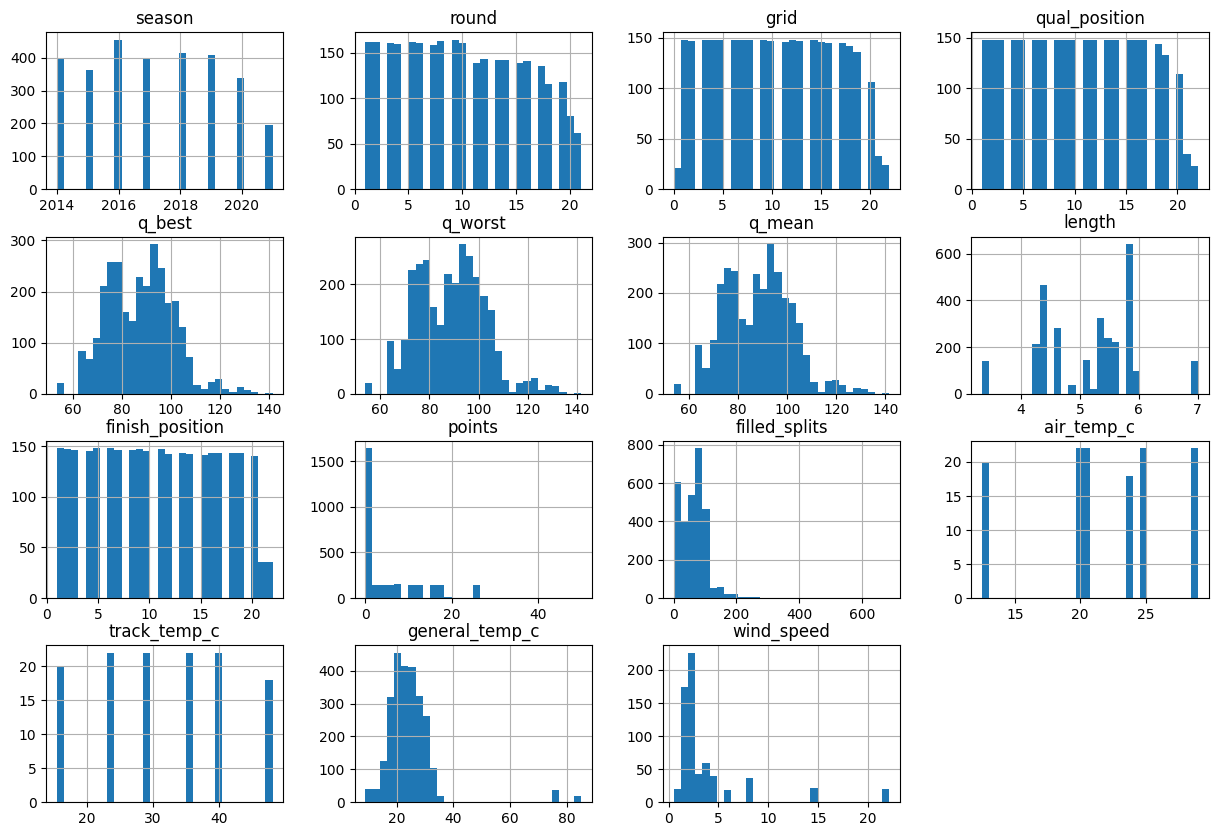

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for distribution of numeric features:
main_df.hist(bins=30, figsize=(15, 10))
plt.show()

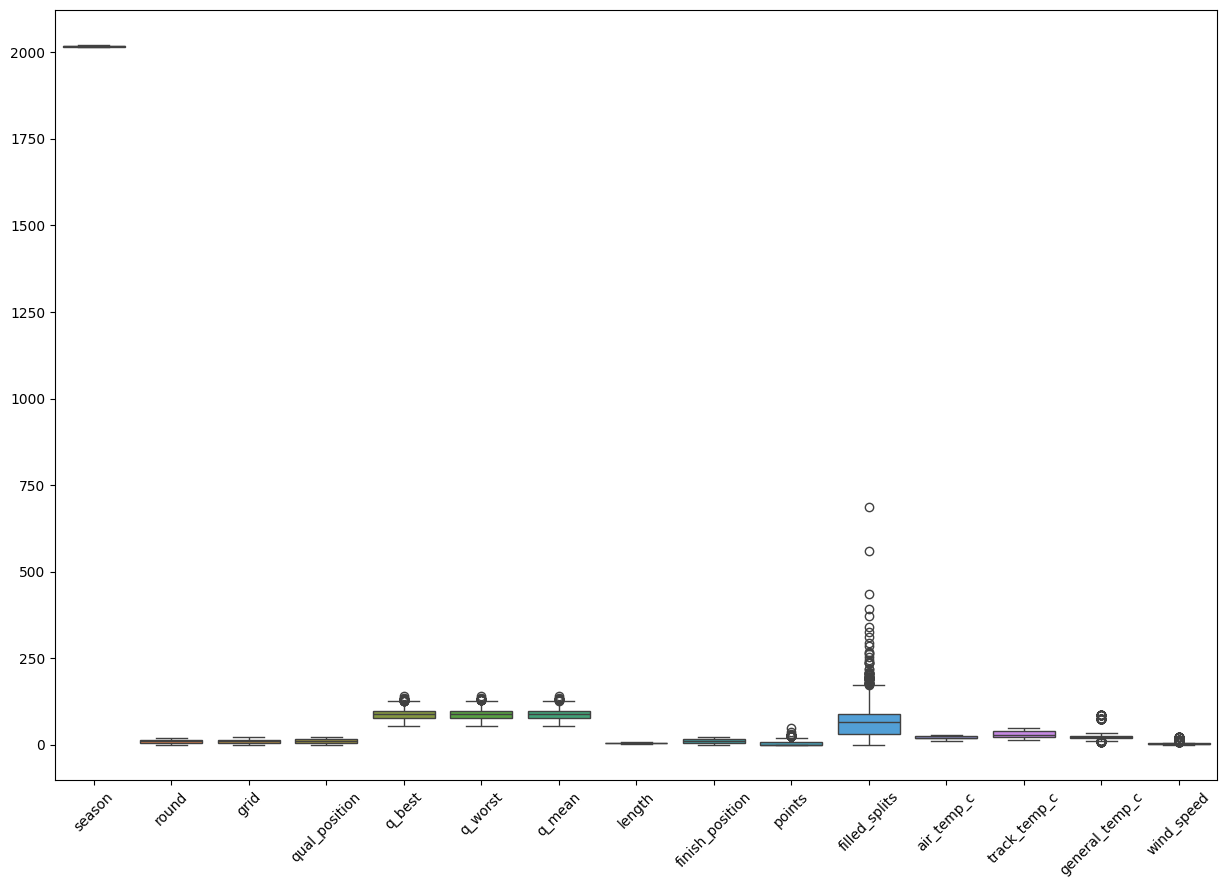

In [45]:
#Boxplots to check for outliers:
plt.figure(figsize=(15, 10))
sns.boxplot(data=main_df)
plt.xticks(rotation=45)
plt.show()

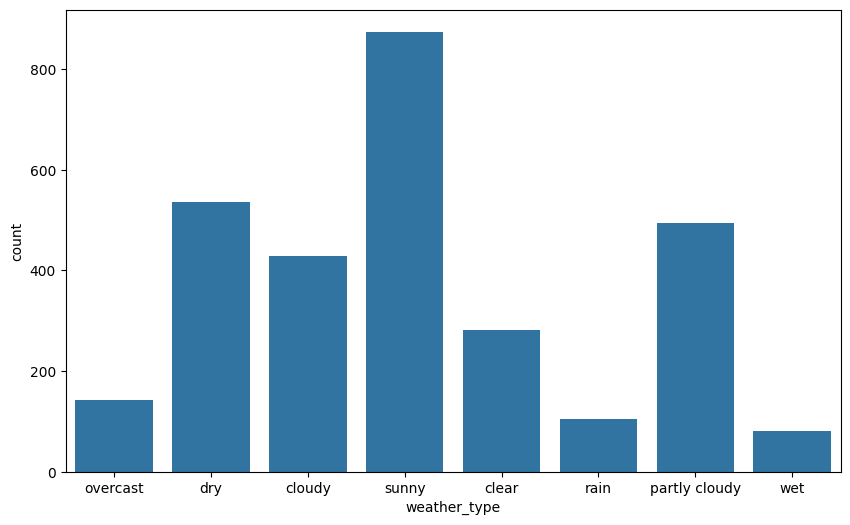

In [46]:
# Countplots for categorical features:
plt.figure(figsize=(10, 6))
sns.countplot(data=main_df, x='weather_type')
plt.show()


<Figure size 1000x600 with 0 Axes>

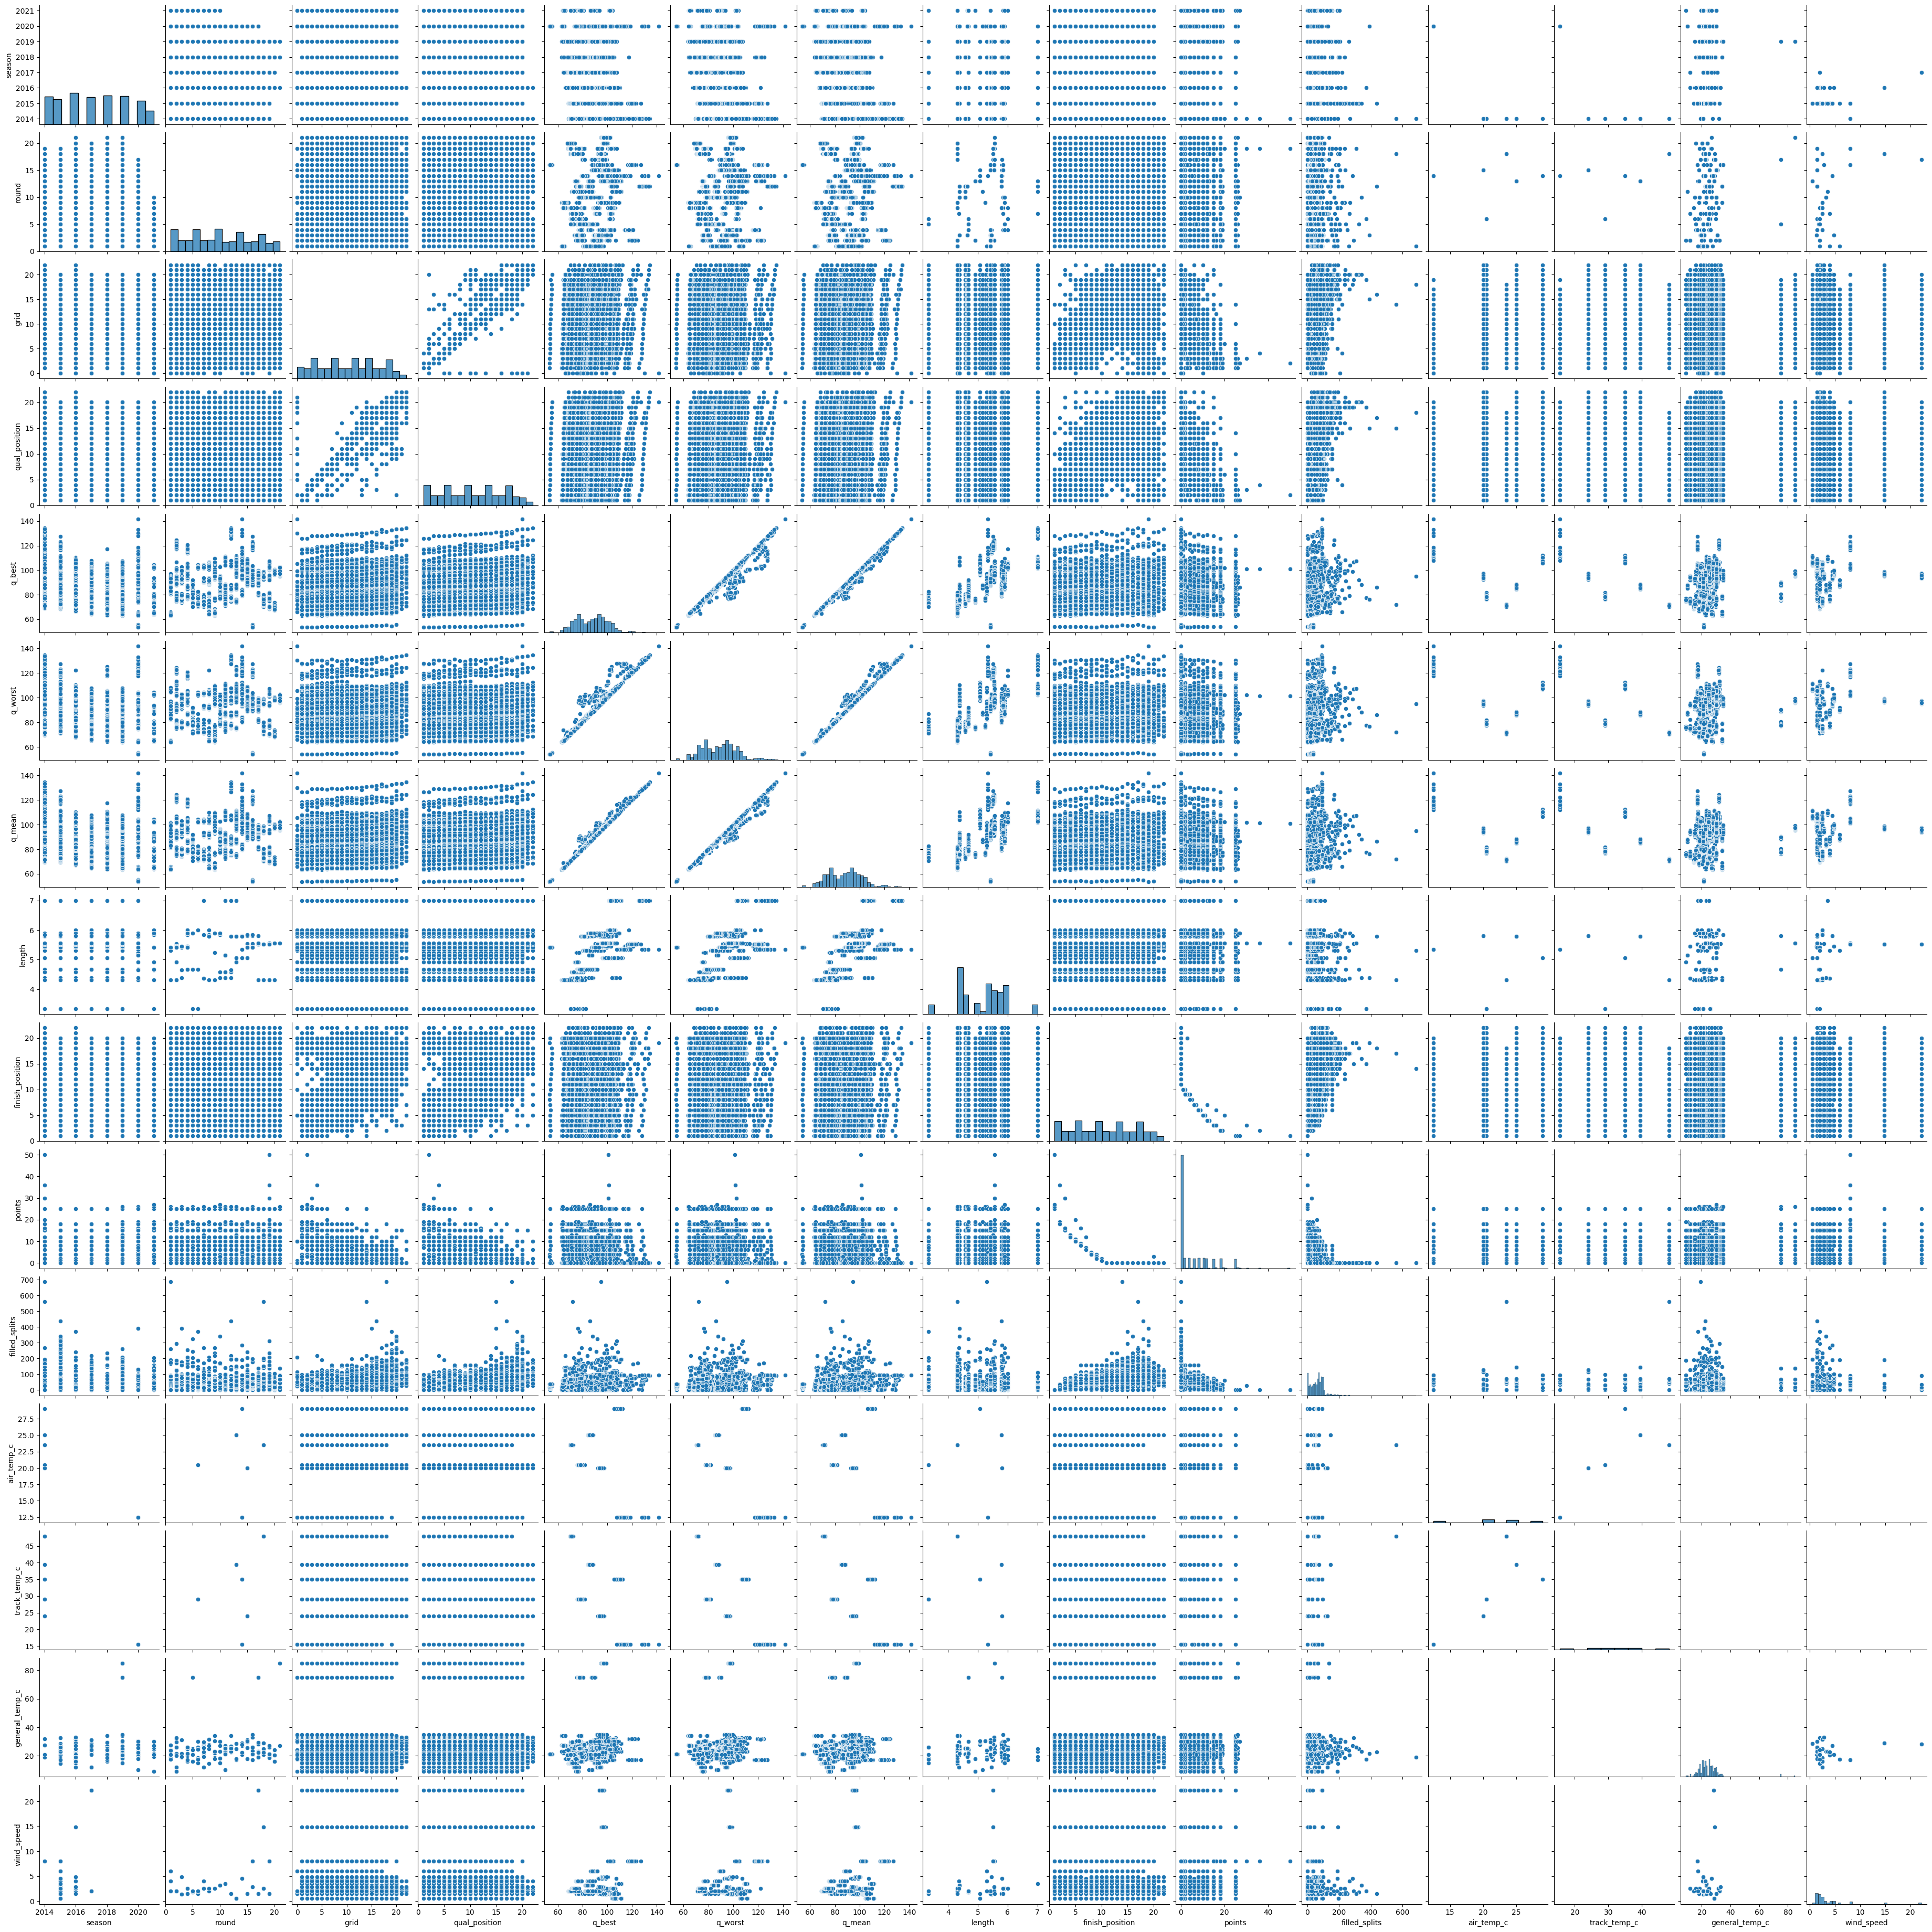

In [50]:
# Pairplots to visualize relationships between features:
plt.figure(figsize=(10, 6))
sns.pairplot(main_df)
plt.show()

## Correlation Analysis

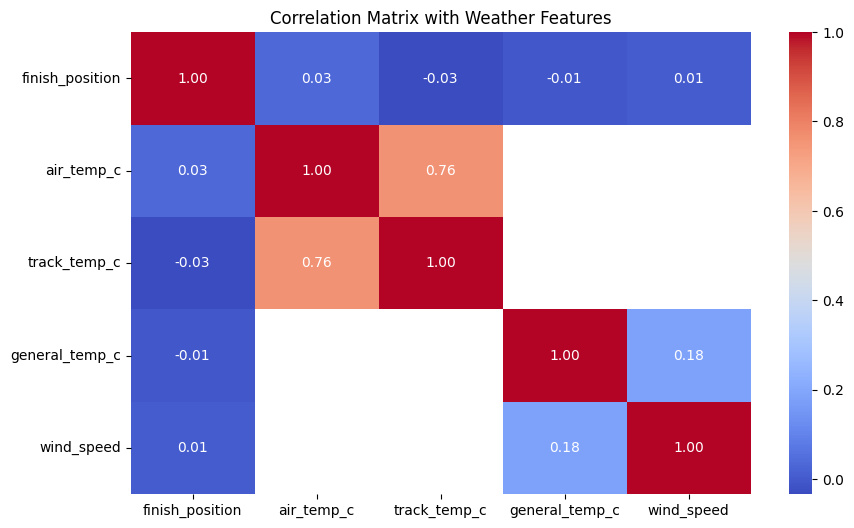

In [57]:
# Assuming you have new weather columns
weather_columns = ['air_temp_c', 'track_temp_c', 'general_temp_c', 'wind_speed']  # Add all relevant weather columns

# Include the target variable in the correlation analysis
correlation_columns = ['finish_position'] + weather_columns
correlation_matrix = main_df[correlation_columns].corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix with Weather Features')
plt.show()plt.figure(figsize=(12, 6))
sns.scatterplot(x='air_temp_c', y='finish_position', data=main_df)
plt.title('Finish Position vs Air Temperature')
plt.xlabel('Air Temperature (°C)')
plt.ylabel('Finish Position')
plt.show()


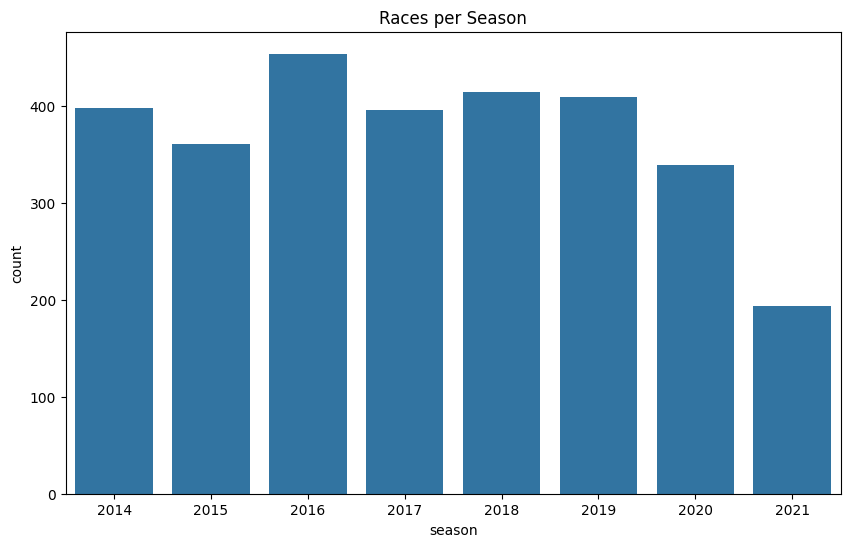

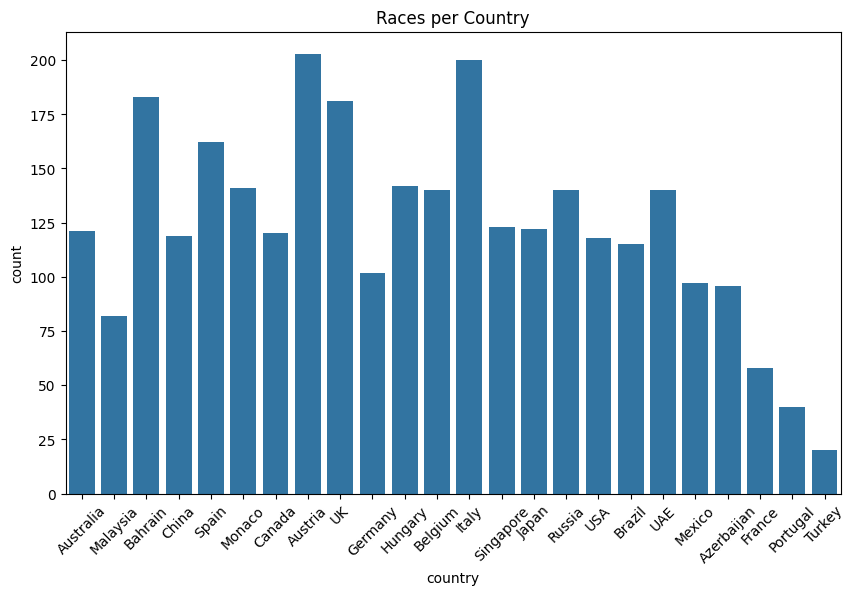

In [64]:
plt.figure(figsize=(10, 6))
sns.countplot(x='season', data=main_df)
plt.title('Races per Season')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='country', data=main_df)
plt.title('Races per Country')
plt.xticks(rotation=45)
plt.show()


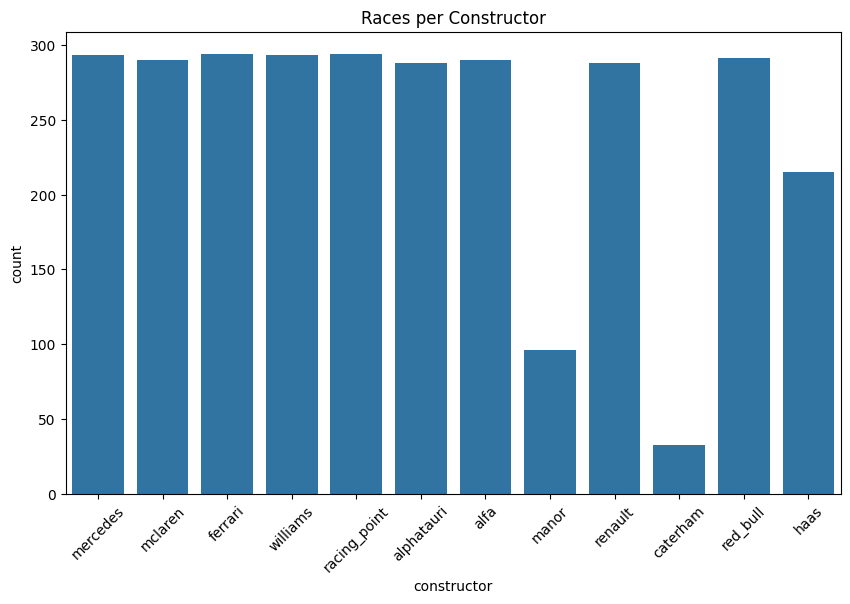

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(x='constructor', data=main_df)
plt.title('Races per Constructor')
plt.xticks(rotation=45)
plt.show()

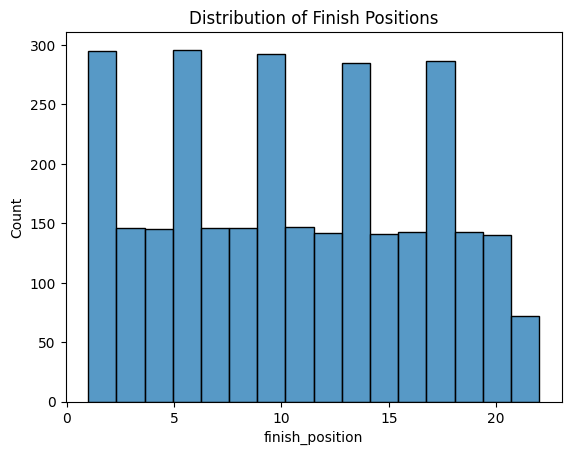

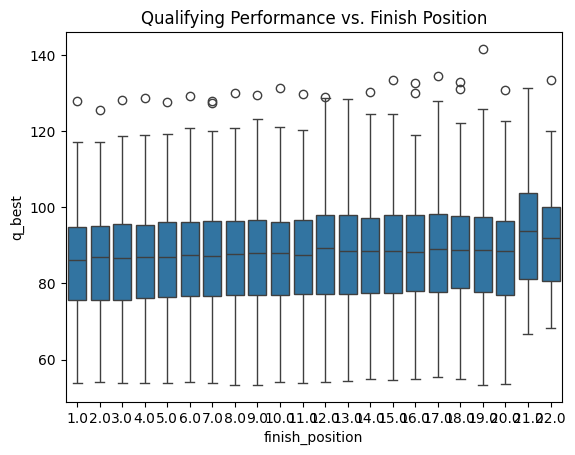

In [68]:
sns.histplot(main_df['finish_position'])
plt.title('Distribution of Finish Positions')
plt.show()

sns.boxplot(x='finish_position', y='q_best', data=main_df)
plt.title('Qualifying Performance vs. Finish Position')
plt.show()

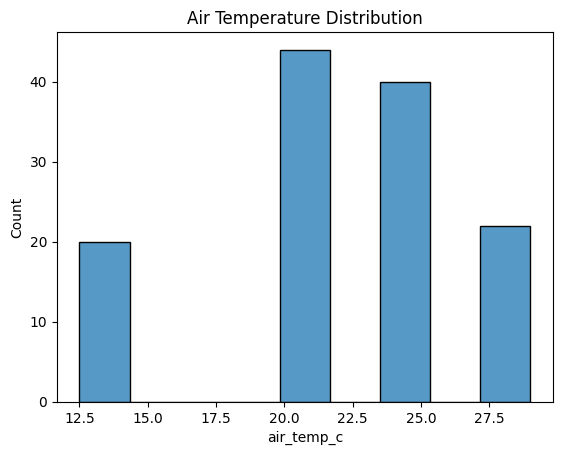

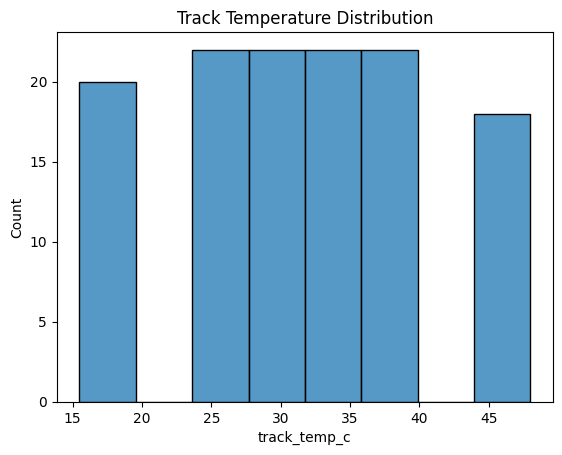

In [69]:
sns.histplot(main_df['air_temp_c'])
plt.title('Air Temperature Distribution')
plt.show()

sns.histplot(main_df['track_temp_c'])
plt.title('Track Temperature Distribution')
plt.show()

## handling Missing Values

In [75]:
# Check missing values
missing_values = main_df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(main_df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Display columns with missing data
missing_data[missing_data['Missing Values'] > 0]

,Missing Values,Percentage
air_temp_c,2839,95.750422
track_temp_c,2839,95.750422
wind_speed,2308,77.841484
wind_unit,2308,77.841484
general_temp_c,395,13.322091
weather_type,21,0.708263


In [81]:
# Drop columns with too many missing values
#main_df = main_df.drop(columns=['air_temp_c', 'track_temp_c', 'wind_speed', 'wind_unit'])

# Fill missing values in general_temp_c by assigning directly
main_df['general_temp_c'] = main_df['general_temp_c'].fillna(main_df['general_temp_c'].mean())

# Fill missing values in weather_type with the mode
main_df['weather_type'] = main_df['weather_type'].fillna(main_df['weather_type'].mode()[0])

In [83]:
# Convert categorical variables to the 'category' data type
categorical_columns = ['race_name', 'name', 'constructor', 'circuitId', 'locality', 'country', 'type', 'direction', 'weather_type']
for col in categorical_columns:
    main_df[col] = main_df[col].astype('category')

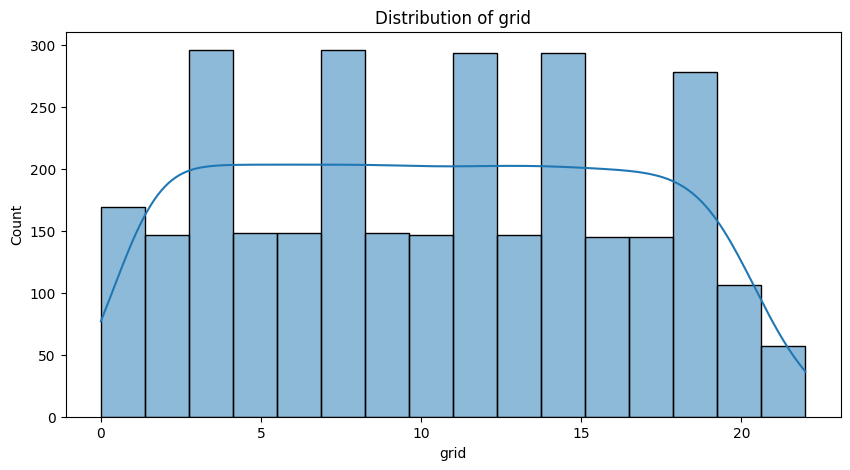

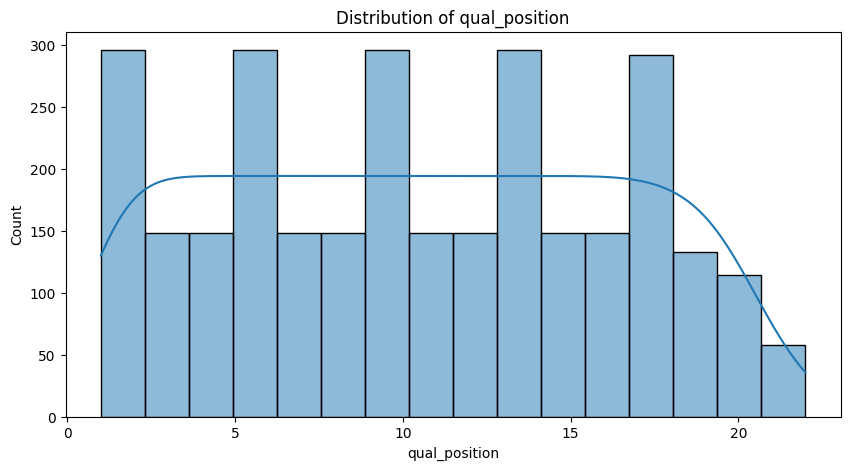

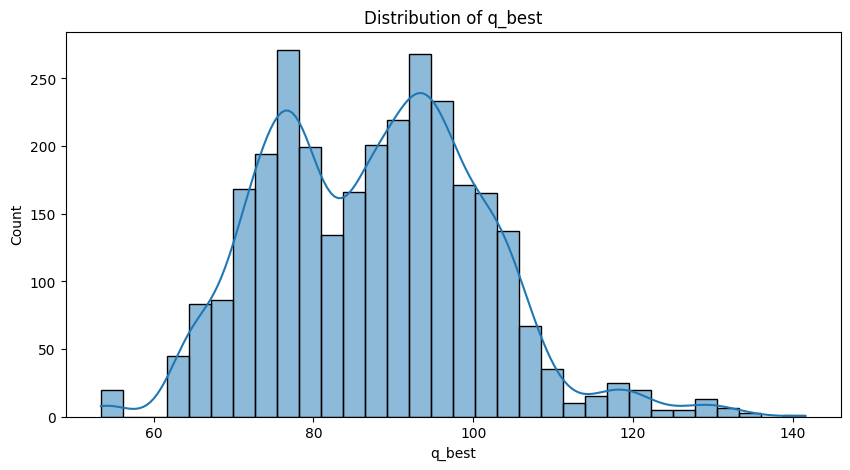

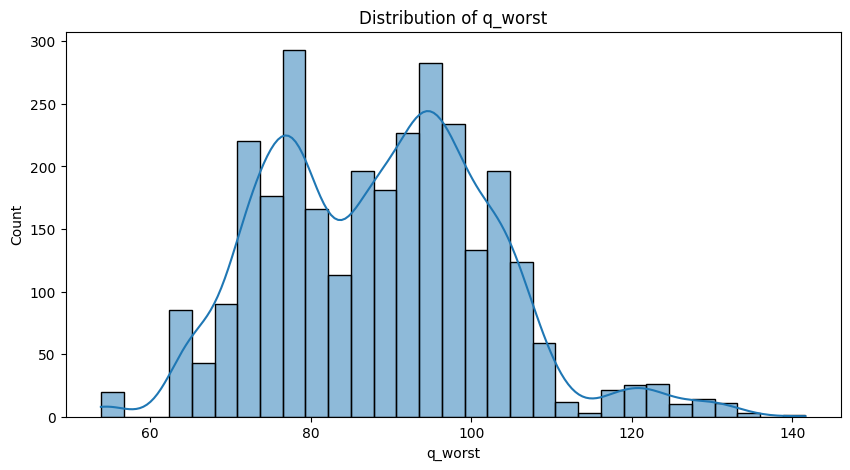

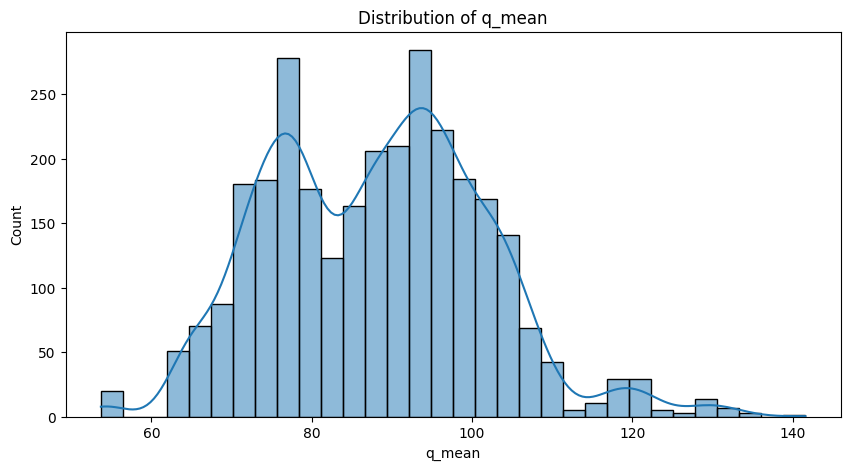

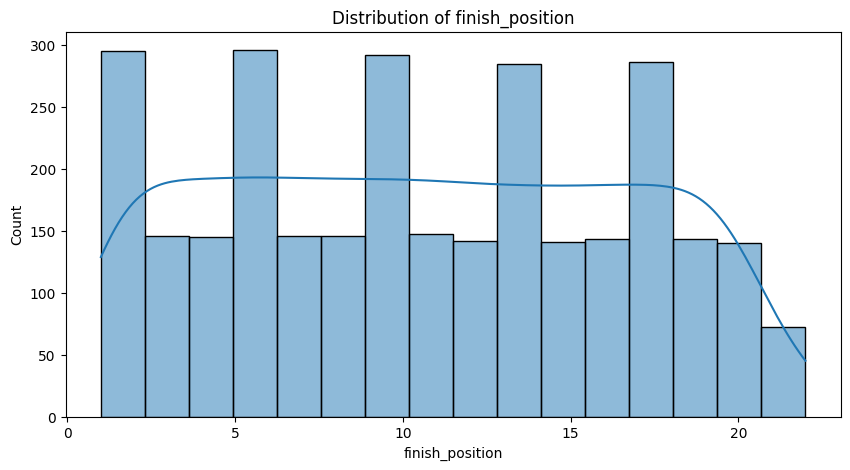

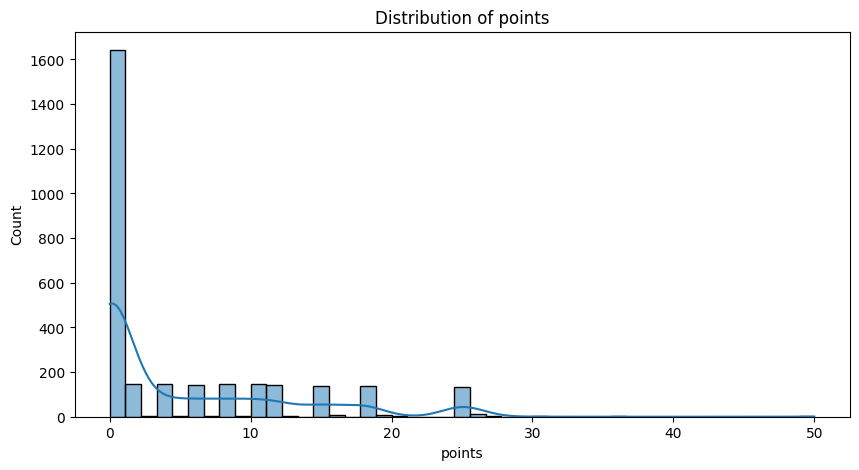

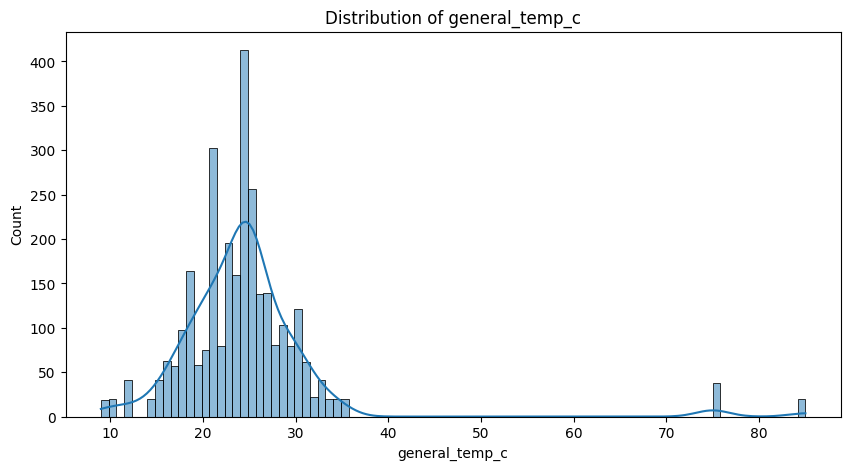

In [85]:
# Plot distribution of key features
numerical_features = ['grid', 'qual_position', 'q_best', 'q_worst', 'q_mean', 'finish_position', 'points', 'general_temp_c']
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(main_df[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

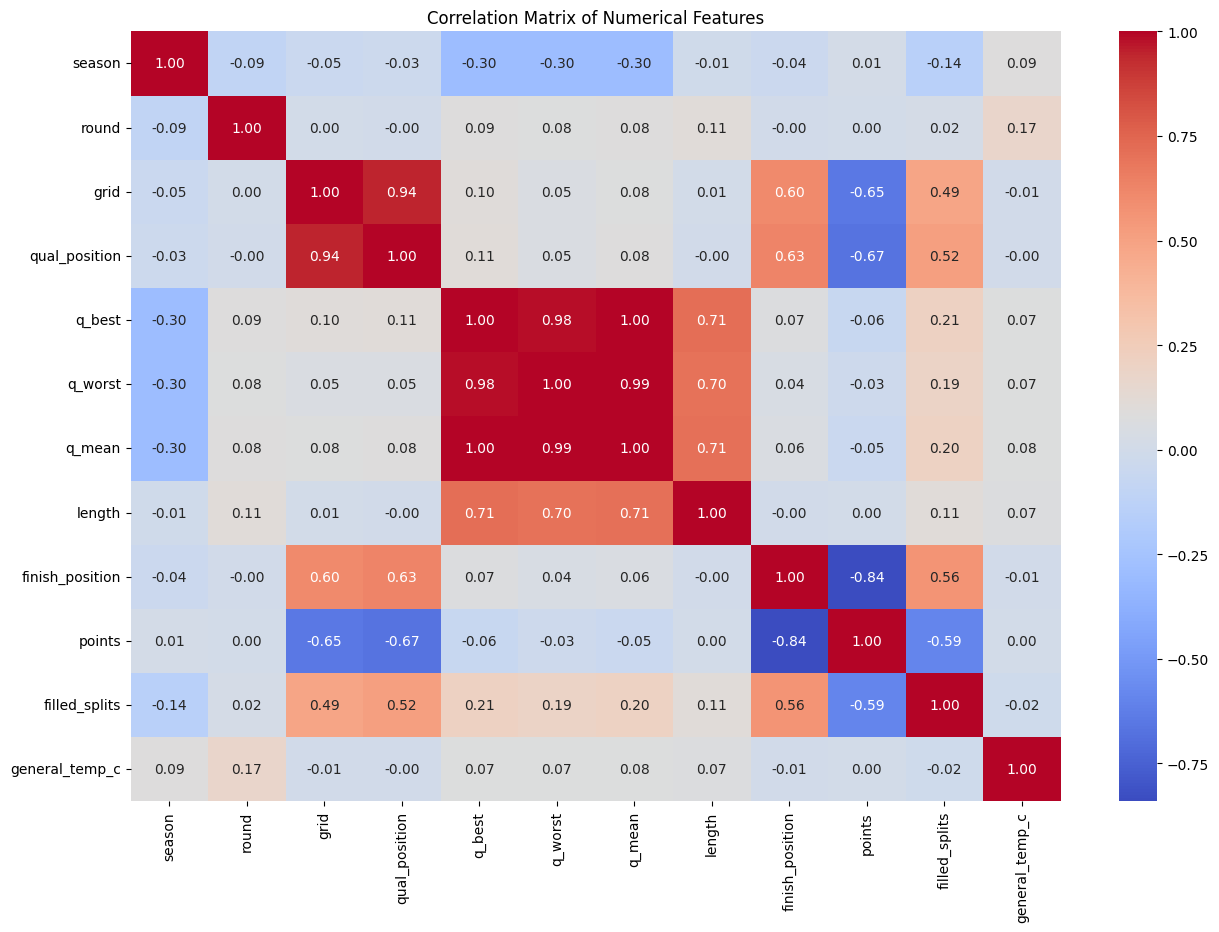

In [88]:
# Filter the DataFrame to include only numeric columns for correlation
numeric_df = main_df.select_dtypes(include=[np.number])

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


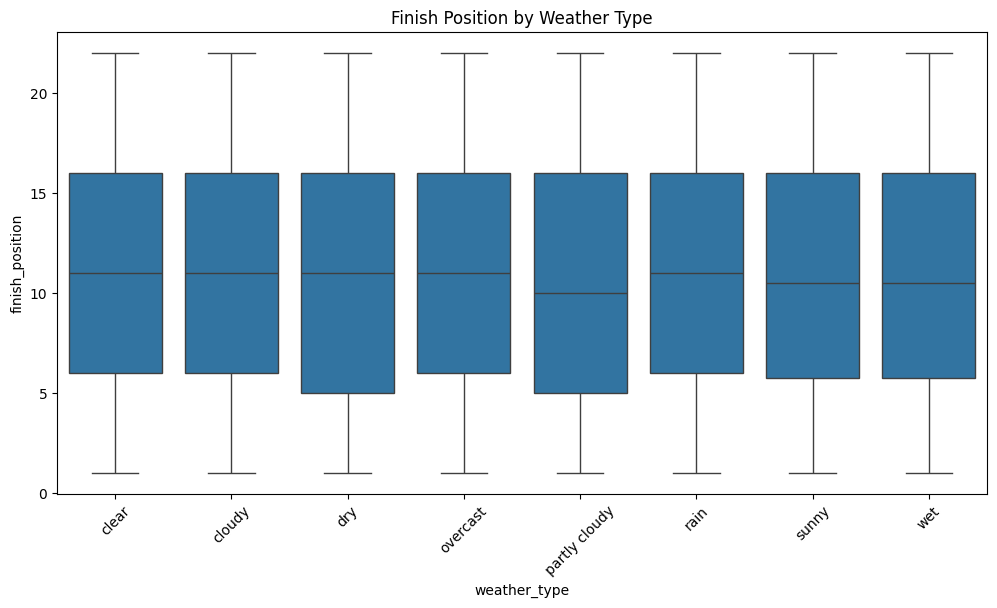

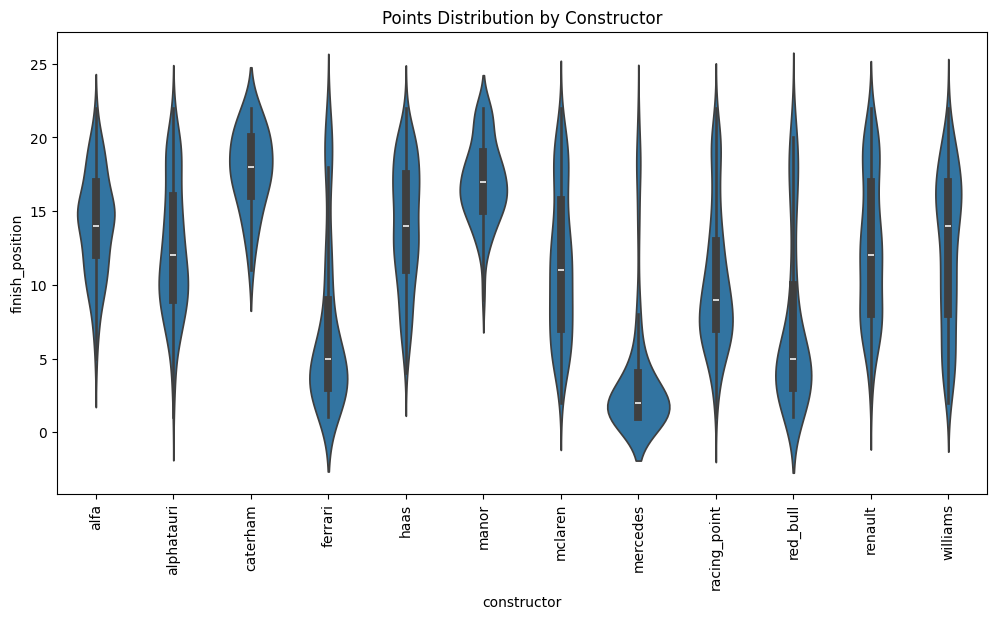

In [101]:
# Boxplot for weather type and finish position
plt.figure(figsize=(12, 6))
sns.boxplot(x='weather_type', y='finish_position', data=main_df)
plt.title("Finish Position by Weather Type")
plt.xticks(rotation=45)
plt.show()

# Violin plot for constructor performance
plt.figure(figsize=(12, 6))
sns.violinplot(x='constructor', y='finish_position', data=main_df)
plt.title("Points Distribution by Constructor")
plt.xticks(rotation=90)
plt.show()

In [93]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 487.6 kB/s eta 0:04:17
   ---------------------------------------- 0.2/124.9 MB 1.7 MB/s eta 0:01:15
   ---------------------------------------- 0.3/124.9 MB 1.9 MB/s eta 0:01:06
   ---------------------------------------- 0.6/124.9 MB 2.7 MB/s eta 0:00:46
   ---------------------------------------- 0.8/124.9 MB 2.8 MB/s eta 0:00:44
   ---------------------------------------- 1.1/124.9 MB 3.2 MB/s eta 0:00:39
   ---------------------------------------- 1.3/124.9 MB 3.5 MB/s eta 0:00:35
    --------------------------------------- 1.6/124.9 MB 3.8 MB/s eta 0:00:33
    --------------------------------------- 1.8/124.9 MB 3.7 MB/s eta 0:00:34
    --------------------------------------- 2.1/124.9 MB 4.0 MB/s eta 0:00:31
    --------------------------------------- 2.2/124.9 MB 4.1 MB/s eta 0:00:3


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [102]:
'''import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
import warnings

warnings.filterwarnings("ignore")

# Load your data
# main_df = pd.read_csv("your_dataset.csv")  # Uncomment and set your dataset path

# Assume 'main_df' is your DataFrame
# Set points as the target variable
X = main_df.drop(columns=['points'])
y = main_df['points']

# Identify numerical and categorical columns
num_features = X.select_dtypes(include=[np.number]).columns
cat_features = X.select_dtypes(exclude=[np.number]).columns

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List to hold model performance metrics
results = {}

# Random Forest
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
results['Random Forest'] = np.mean(-rf_scores)

# XGBoost
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(random_state=42))
])
xgb_scores = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
results['XGBoost'] = np.mean(-xgb_scores)

# LightGBM
lgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LGBMRegressor(random_state=42))
])
lgb_scores = cross_val_score(lgb_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
results['LightGBM'] = np.mean(-lgb_scores)

# Neural Network
nn_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', MLPRegressor(random_state=42, max_iter=1000))
])
nn_scores = cross_val_score(nn_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
results['Neural Network'] = np.mean(-nn_scores)

# Display results
for model, score in results.items():
    print(f"{model}: Mean Squared Error = {score:.2f}")
'''

'import pandas as pd\nimport numpy as np\nfrom sklearn.model_selection import train_test_split, cross_val_score, KFold\nfrom sklearn.preprocessing import StandardScaler, OneHotEncoder\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.ensemble import RandomForestRegressor\nfrom xgboost import XGBRegressor\nfrom lightgbm import LGBMRegressor\nfrom sklearn.neural_network import MLPRegressor\nimport warnings\n\nwarnings.filterwarnings("ignore")\n\n# Load your data\n# main_df = pd.read_csv("your_dataset.csv")  # Uncomment and set your dataset path\n\n# Assume \'main_df\' is your DataFrame\n# Set points as the target variable\nX = main_df.drop(columns=[\'points\'])\ny = main_df[\'points\']\n\n# Identify numerical and categorical columns\nnum_features = X.select_dtypes(include=[np.number]).columns\ncat_features = X.select_dtypes(exclude=[np.number]).columns\n\n# Preprocessing pipeline\npreprocessor = ColumnTransformer(\n    transformers=[\n   

In [103]:
!pip install joblib


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [108]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import joblib

# Load the data
main_df = pd.read_csv('./CSV/main_df.csv').drop(['Unnamed: 0'], axis=1)

In [109]:
# Convert age from string to integer
def day_split(age):
    return int(age.split(' ')[0])
main_df.ageDuringRace = main_df.ageDuringRace.apply(day_split)

In [110]:
# Split features and target
X = main_df.drop(['finish_position', 'points', 'filled_splits'], axis=1)
y = main_df['finish_position']  # Target variable

In [111]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('weather', CountVectorizer(binary=True), 'weather'),
        ('num', StandardScaler(), ['grid', 'qual_position', 'q_best', 'q_worst', 'q_mean', 'ageDuringRace', 'length']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), 
         ['type', 'direction', 'constructor', 'circuitId', 'country'])
    ])

In [113]:
# Create pipeline
from sklearn.pipeline import Pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        random_state=42
    ))
])

In [114]:
# Train model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
print('R2 Score:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

# Save model
joblib.dump(model, 'f1_weather_model.pkl')

R2 Score: 0.3413035017071112
RMSE: 4.75868958228089


['f1_weather_model.pkl']

In [115]:
def predict_race_performance(weather, grid, constructor, circuit, country, type_circuit):
    """
    Predict race finish position based on conditions
    """
    data = pd.DataFrame({
        'weather': [weather],
        'grid': [grid],
        'constructor': [constructor],
        'circuitId': [circuit],
        'country': [country],
        'type': [type_circuit]
    })
    
    prediction = model.predict(data)
    return prediction[0]

In [116]:
# Example prediction
sample_prediction = predict_race_performance(
    weather="dry sunny 25°c",
    grid=3,
    constructor="mercedes",
    circuit="monaco",
    country="Monaco",
    type_circuit="Street circuit"
)
print(f"Predicted finish position: {sample_prediction}")

ValueError: columns are missing: {'q_mean', 'length', 'qual_position', 'direction', 'q_best', 'q_worst', 'ageDuringRace'}